# AAI 501 Final Team Project

**Authors:** Zach Artman, Jim McCarthy, Anand Fernandes

**Date:** 07/25/2024 

**Project Goal**: To be determined.

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./HR_comma_sep.csv')
df.head()

categorical_variables = ['Department', 'salary']
label_encoders = {}

# Convert categorical variables to encoded
for variable in categorical_variables:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable])
    label_encoders[variable] = le

for variable in categorical_variables:
    print(f"{variable}: {dict(zip(label_encoders[variable].classes_, label_encoders[variable].transform(label_encoders[variable].classes_)))}")

# renaming typo
df.rename(columns={'average_monthly_hours': 'average_monthly_hours'}, inplace=True)
df.head()

Department: {'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4, 'marketing': 5, 'product_mng': 6, 'sales': 7, 'support': 8, 'technical': 9}
salary: {'high': 0, 'low': 1, 'medium': 2}


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


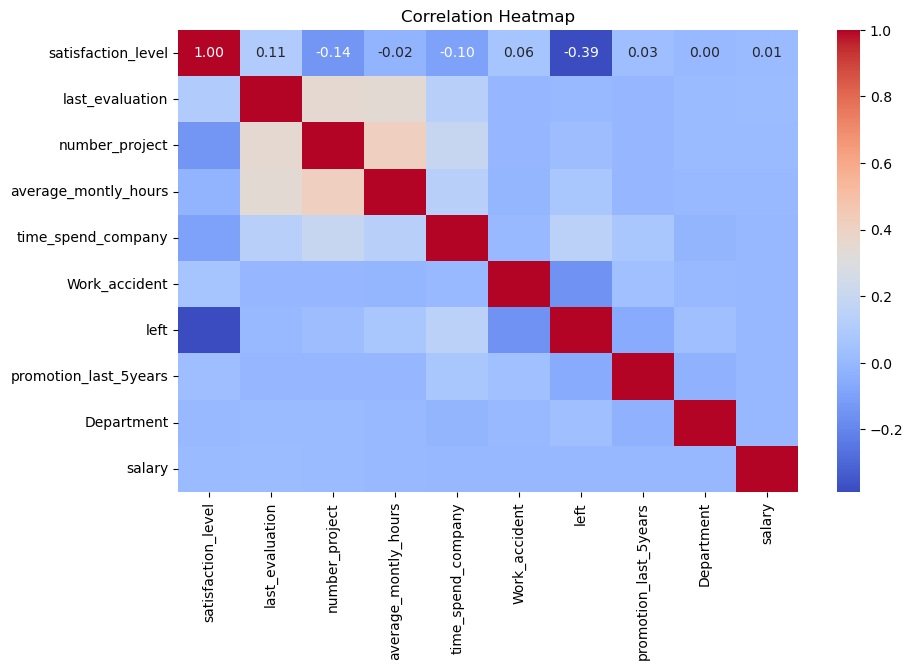

In [3]:
# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['number_project'], df['average_monthly_hours'], alpha=0.5)
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours by Number of Projects')
plt.show()

KeyError: 'average_monthly_hours'

<Figure size 1000x600 with 0 Axes>

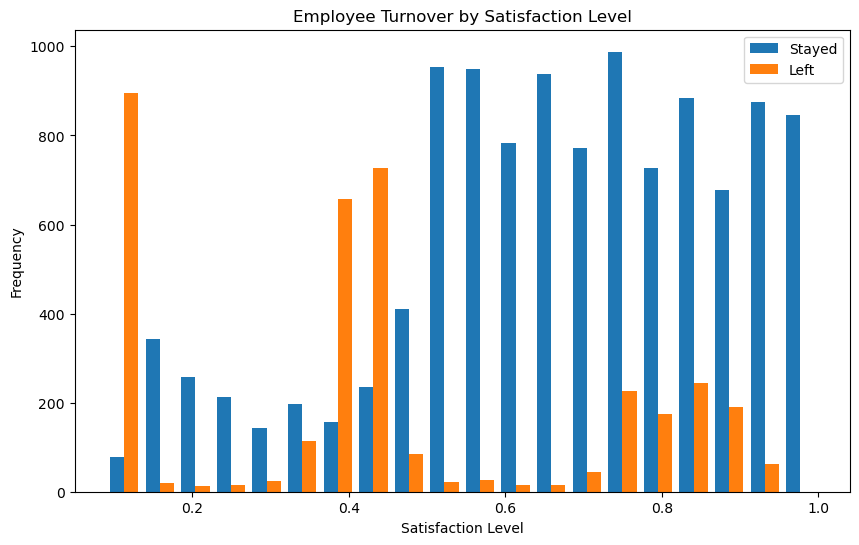

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['left'] == 0]['satisfaction_level'], df[df['left'] == 1]['satisfaction_level']], 
         bins=20, label=['Stayed', 'Left'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Employee Turnover by Satisfaction Level')
plt.legend()
plt.show()

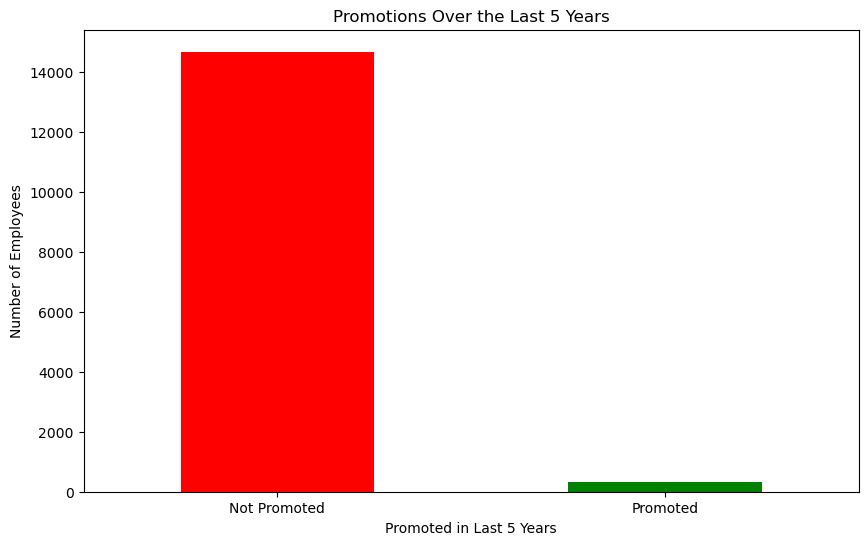

0.02173024523160763

In [ ]:
plt.figure(figsize=(10, 6))
promotion_counts = df['promotion_last_5years'].value_counts()
promotion_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Number of Employees')
plt.title('Promotions Over the Last 5 Years')
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], rotation=0)
plt.show()

overall_percentage_promoted = promotion_counts[1] / promotion_counts[0]
overall_percentage_promoted

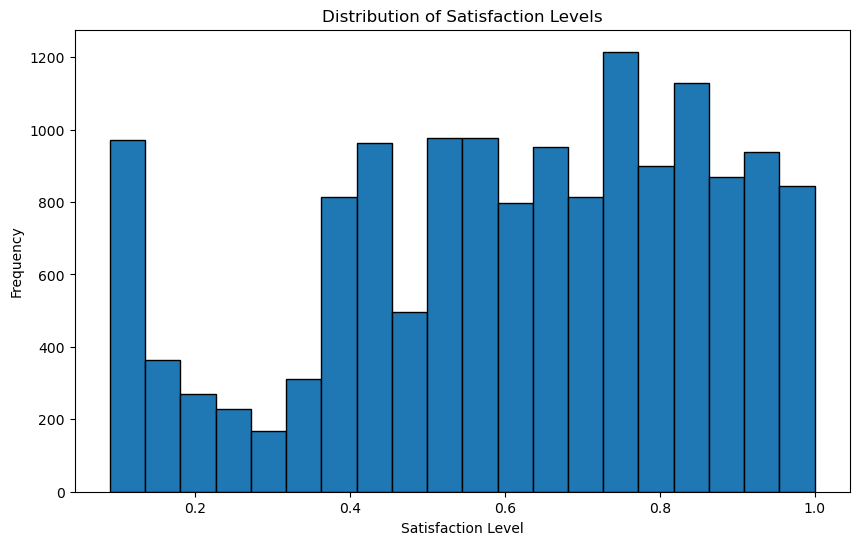

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['satisfaction_level'], bins=20, edgecolor='black')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels')
plt.show()

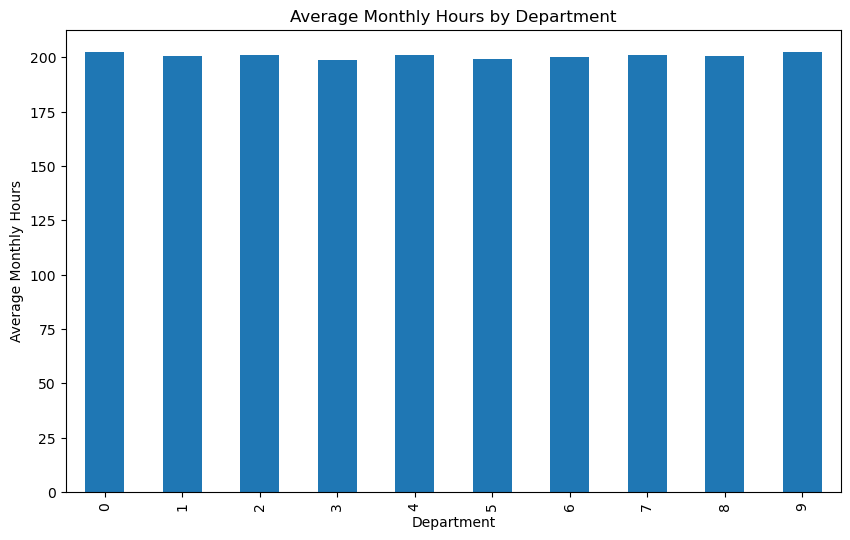

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Department')['average_monthly_hours'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours by Department')
plt.show()

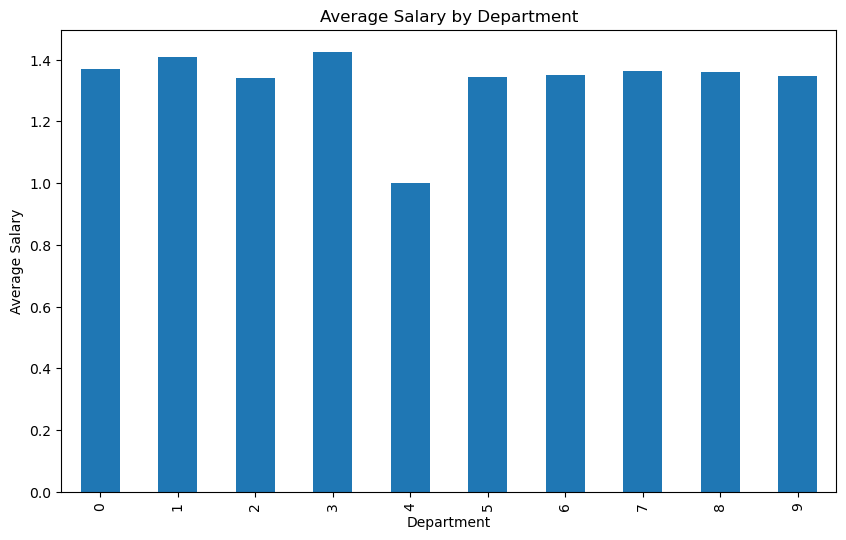

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Department')['salary'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')
plt.show()

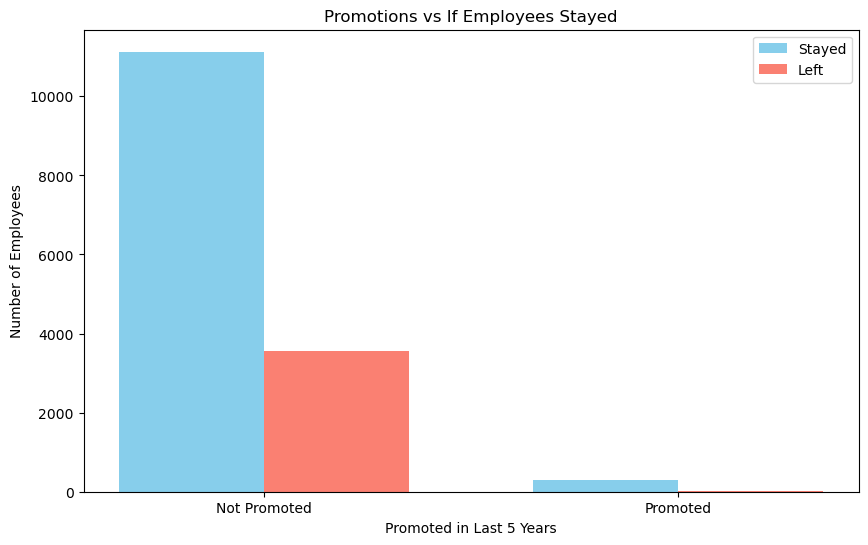

In [ ]:
plt.figure(figsize=(10, 6))
promotion_stayed = df[df['left'] == 0]['promotion_last_5years'].value_counts()
promotion_left = df[df['left'] == 1]['promotion_last_5years'].value_counts()

bar_width = 0.35
index = [0, 1]

plt.bar(index, promotion_stayed, bar_width, label='Stayed', color='skyblue')
plt.bar([i + bar_width for i in index], promotion_left, bar_width, label='Left', color='salmon')

plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Number of Employees')
plt.title('Promotions vs If Employees Stayed')
plt.xticks([i + bar_width / 2 for i in index], ['Not Promoted', 'Promoted'])
plt.legend()
plt.show()


`Main takeaways from graphs: `
- Each department has pretty much the same amount of monthly hours
- The majority of satisfaction levels are greater than half, but there is a big spike at 0.1
- Only an average of 2% of people were promoted in the last 5 years (Seems weird, we should look more into this)
- Big relation between satisfaction level and if someone left the company or stayed
- Average monthly hours and number of projects has some correlation
- Management has the lowest salary (Interesting)

`Possible things to analyze:`
- Predict which employees are going to get promoted
- Predict salary of employee
- Come up with some strategies to improve employee retention; look at what makes people stay

### Predicting if someone is going to get a prediction

In [ ]:
X = df.drop(columns=['promotion_last_5years'])
y = df['promotion_last_5years']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2946
           1       1.00      0.56      0.71        54

    accuracy                           0.99      3000
   macro avg       1.00      0.78      0.86      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[2946    0]
 [  24   30]]


Confusion matrix shows us that there are 2946 true positives, 0 false positives, 24 false negatives, and 30 true negatives.

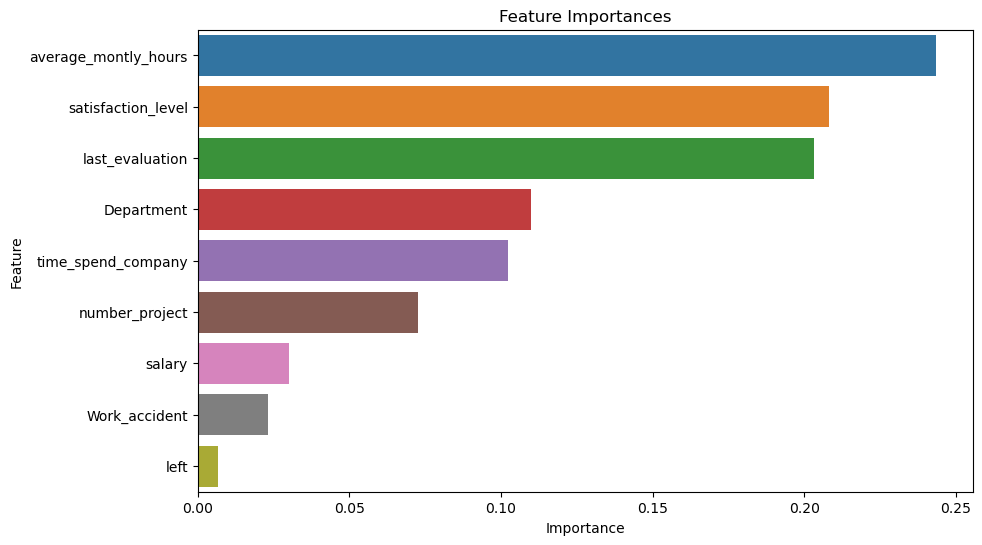

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

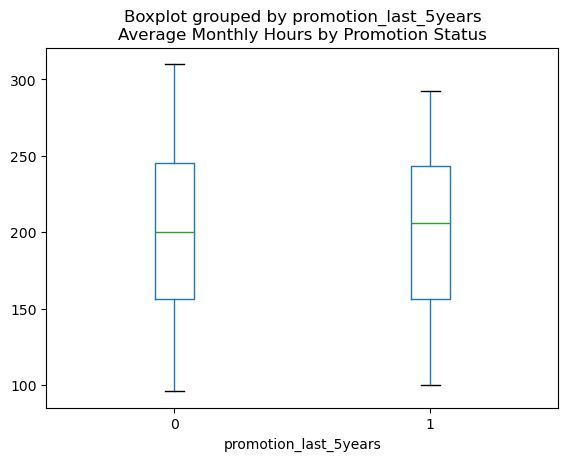

In [ ]:
df.boxplot(column='average_monthly_hours', by='promotion_last_5years', grid=False)
plt.title('Average Monthly Hours by Promotion Status')
plt.show()

`Interpretation`: When looking at the results from thsi model, we see that the precision for predicting promotions is perfect at 1.00, so all predicted promotions were correct. However, the recall for promotions is lower at 0.56, indicating that the model missed more than half of the actual promotions. In other words, if the model predicts that someone will get a promotion, they almost certainly will. But the model often fails to identify all employees who will get promoted, so it may incorrectly predict that some individuals will not get a promotion even though they will.